In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [7]:
#path="/content/drive/MyDrive/yellow_tripdata_2022-01.parquet"
path = "/content/yellow_tripdata_2022-01.parquet"
df=pd.read_parquet(path)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5,0.0
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5,0.0
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5,0.0


In [8]:
df.shape

(2463931, 19)

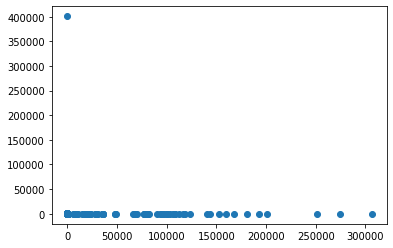

In [9]:
plt.scatter(df["trip_distance"], df["total_amount"])

In [10]:
df=df[(df['total_amount']<500) & (df['total_amount']>20) & (df['trip_distance']<100) & (df['trip_distance']>20)]

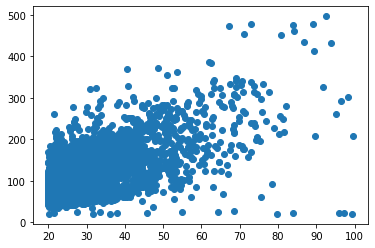

In [11]:
plt.scatter(df["trip_distance"], df["total_amount"])

In [12]:
df = df[['tpep_pickup_datetime', 'passenger_count', 'trip_distance', 'total_amount']]
df.head()

,tpep_pickup_datetime,passenger_count,trip_distance,total_amount
76,2022-01-01 00:34:34,2.0,20.70,67.85
131,2022-01-01 00:30:25,2.0,20.90,75.72
219,2022-01-01 00:52:54,1.0,21.75,71.16
285,2022-01-01 00:04:32,1.0,21.50,65.60
304,2022-01-01 00:19:10,2.0,20.35,63.60


In [13]:
df.shape

(20682, 4)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20682 entries, 76 to 2463667
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   tpep_pickup_datetime  20682 non-null  datetime64[ns]
 1   passenger_count       20245 non-null  float64       
 2   trip_distance         20682 non-null  float64       
 3   total_amount          20682 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 807.9 KB


In [15]:
df.describe()

,passenger_count,trip_distance,total_amount
count,20245.000000,20682.000000,20682.000000
mean,1.474784,23.609201,82.194548
std,0.979245,6.405699,32.250600
min,0.000000,20.010000,20.300000
25%,1.000000,20.610000,67.600000
50%,1.000000,21.415000,74.220000
75%,2.000000,23.600000,81.120000
max,9.000000,99.460000,496.550000


In [16]:
df.isnull().sum()

tpep_pickup_datetime      0
passenger_count         437
trip_distance             0
total_amount              0
dtype: int64

In [17]:
import numpy as np

In [18]:
df = df.dropna(how='any',axis=0)

In [19]:
df.isnull().sum()

tpep_pickup_datetime    0
passenger_count         0
trip_distance           0
total_amount            0
dtype: int64

In [20]:
df.nunique()

tpep_pickup_datetime    20137
passenger_count             8
trip_distance            2078
total_amount             3098
dtype: int64

In [21]:
df['tpep_pickup_datetime'] = pd.to_datetime(df.tpep_pickup_datetime)

Exploratory Data Analysis (EDA)

In [22]:
df.loc[:, 'pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df.loc[:, 'pickup_weekday'] = df['tpep_pickup_datetime'].dt.day_name()
df.loc[:, 'pickup_date'] = df['tpep_pickup_datetime'].dt.day
df.loc[:, 'pickup_month'] = df['tpep_pickup_datetime'].dt.month
df.loc[:, 'pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


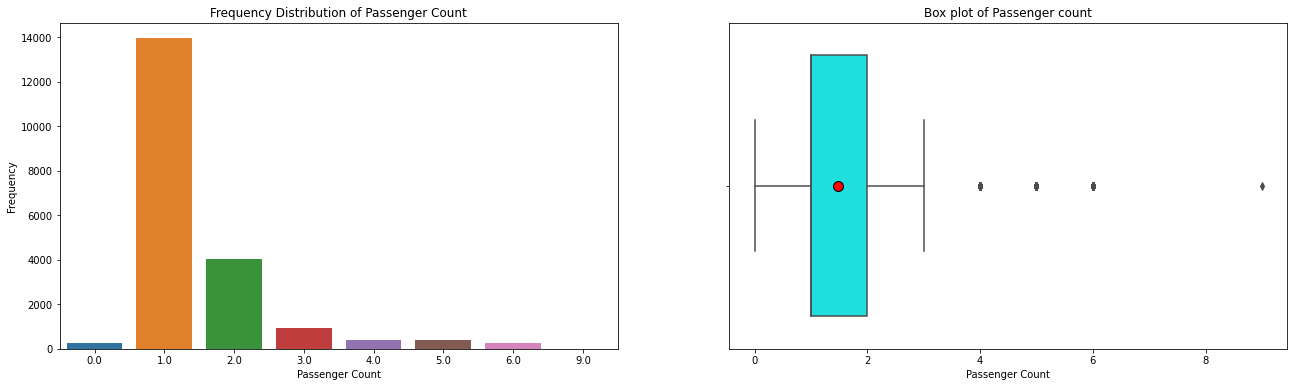

In [23]:
plt.figure(figsize=(22, 6))
#fig, axs = plt.subplot(ncols=2)

# Passenger Count
plt.subplot(121)
sb.countplot(df['passenger_count'])
plt.xlabel('Passenger Count')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Passenger Count')

plt.subplot(122)
sb.boxplot(df['passenger_count'], color = 'cyan', showmeans=True, 
           meanprops={"marker":"o", "markerfacecolor":"Red", 
                      "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title('Box plot of Passenger count');

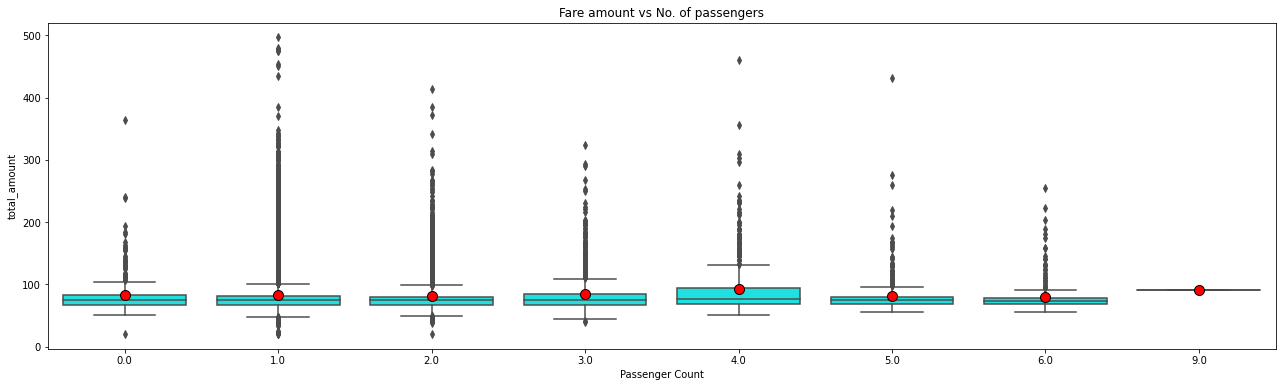

In [24]:
plt.figure(figsize=(22, 6))
sb.boxplot(x = df['passenger_count'],y = df['total_amount'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title ("Fare amount vs No. of passengers");

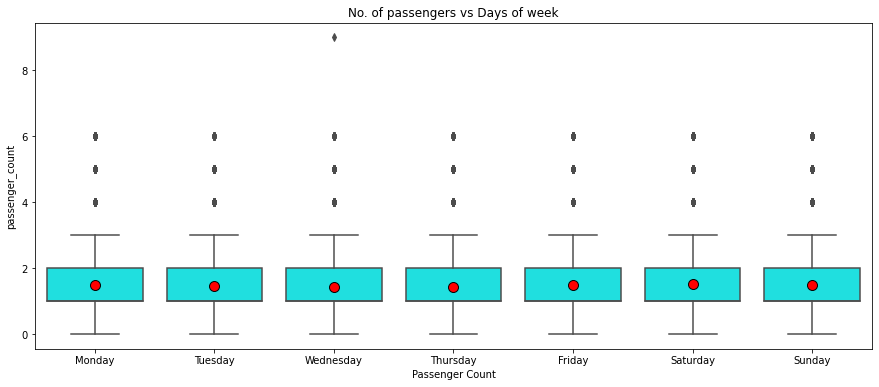

In [25]:
plt.figure(figsize=(15, 6))
sb.boxplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],y = df['passenger_count'], color = 'cyan', showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black","markersize":"10"}
)
plt.xlabel('Passenger Count')
plt.title ("No. of passengers vs Days of week");

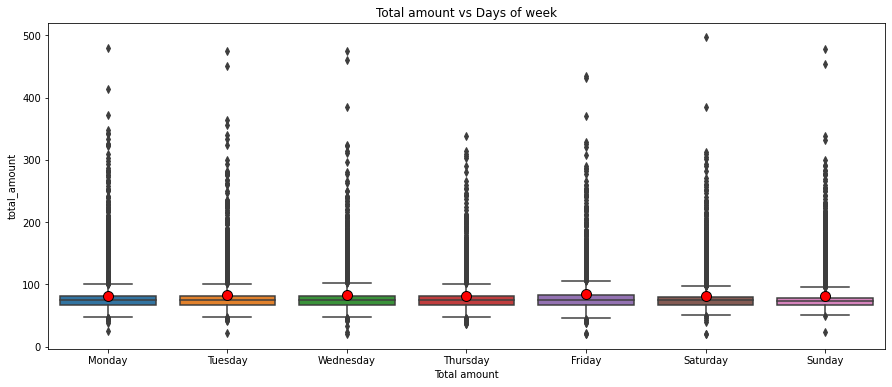

In [26]:
plt.figure(figsize=(15, 6))
sb.boxplot(x = df['pickup_weekday'], order = ['Monday', 'Tuesday', 'Wednesday', 
                                           'Thursday', 'Friday', 'Saturday', 'Sunday'],
           y = df['total_amount'], showmeans=True, 
            meanprops={"marker":"o", "markerfacecolor":"Red", "markeredgecolor":"black",
                       "markersize":"10"}
)
plt.xlabel('Total amount')
plt.title ("Total amount vs Days of week");

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


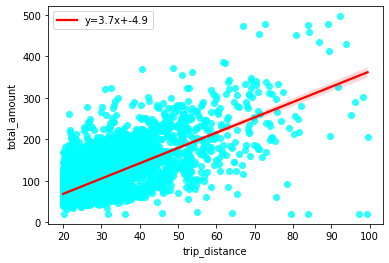

In [27]:
from scipy import stats
x = df['trip_distance']
y = df['total_amount']
slope, intercept, r_value, p_value, std_err = stats.linregress(df['trip_distance'],df['total_amount'])
ax = sb.regplot(x, y, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept), 
                                "color": "red"},scatter_kws={"color": "cyan"})
ax.legend();

In [28]:
df.columns

Index(['tpep_pickup_datetime', 'passenger_count', 'trip_distance',
       'total_amount', 'pickup_hour', 'pickup_weekday', 'pickup_date',
       'pickup_month', 'pickup_day'],
      dtype='object')

In [29]:
# I used complex feature to get better model performance 
# I used both numeric and categorical data
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


# Engineering my features 
all_features = ['passenger_count', 'trip_distance',  'pickup_hour',  'pickup_date', 'pickup_month', 'pickup_day', 'total_amount']
features = ['passenger_count', 'trip_distance', 'pickup_hour',  'pickup_date', 'pickup_month', 'pickup_day']

X_all = df[all_features].values

# Standarized my data 
scaler = preprocessing.StandardScaler()
X_all= scaler.fit(X_all).transform(X_all)


X = X_all[:, :-1]
Y = X_all[:, -1]

print(f"X: {X.shape}, Y: {Y.shape}")

X: (20245, 6), Y: (20245,)


In [30]:
# I just wanted to make sure the data transformation was correct
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=X[:, 1], y=Y, mode='markers'))
fig.show()

In [31]:
# spiliting the data to Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [33]:
# Defining Random Forest Model
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Training the Model
rf.fit (X_train, y_train)

# Using the model to predict the value
Yhat_rf = rf.predict(X_test)

In [34]:
# Finding the error for the model
rf.score(X, y)

-6.394980780179406

In [35]:
# Ploting the distribution of the error
fig = go.Figure(data=go.Histogram(x=Yhat_rf-y_test))
fig.show()

In [36]:
# finding the average and SD of the Error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score


R_Squared = np.mean(cross_val_score(rf, X_train, y_train, cv=5))
Standard_deviation = np.std(cross_val_score(rf, X_train, y_train, cv=5))
print('R2 of Random Forest Regression model is:',R_Squared)
print('Standard deviation of R2 of Random Forest Regression model is:',Standard_deviation)

R2 of Random Forest Regression model is: 0.4724365738407398
Standard deviation of R2 of Random Forest Regression model is: 0.016636418708455333


In [37]:
# Analysing the Model
fig = go.Figure(data=go.Bar(x=features, y = rf.feature_importances_))
fig.show()

In [38]:
# Analysing the Model 
rf.feature_importances_

array([3.02127111e-02, 7.41847146e-01, 9.78296051e-02, 8.21907841e-02,
       9.35164904e-07, 4.79188182e-02])